In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'tweet_id,created_date,username,location,retweeted_username,content_type,mentioned_users,text\r\n1.50E+18,Sat Feb 26 16:20:52 +0000 2022,Angela Pinilla (She/Her),"Boston, US",Mike Hudema,RT,[\'Mike Hudema\'],"RT @MikeHudema: Antarctic sea ice falls to lowest level since measurements began: https://t.co/z1bRtZw0BQ\n\nWe\'re in a #ClimateCrisis. We mu\xe2\x80\xa6"\r\n1.50E+18,Sat Feb 26 16:20:45 +0000 2022,Milly Fawcett,"England, United Kingdom",Milly Fawcett,Tweet (self-loop),"[\'Robert Peston\', \'Dept for BEIS\', \'ecotricity\']","@Peston All of a sudden @beisgovuk wonders why they didn\xe2\x80\x99t invest more in #renewableenergy \xf0\x9f\xa4\x94\n\n#GreenEnergy #windpower @ecotricity #renewable #energy https://t.co/hcHmmwcg5z"\r\n1.50E+18,Sat Feb 26 16:19:54 +0000 2022,Dr. Mani DasGupta,"England, United Kingdom",Jo\xc3\xa3o Pedro Costa \xf0\x9f\x8c\xbb\xf0\x9f\x92\x9a\xf0\x9f\x87\xb5\xf0\x9f\x87\xb9\xf0\x9f\x87\xba\xf0\x9f\x87\xa6\xf0\x9f\x87\xaa\xf0\x9f\x87\xba\xf0\x9

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import accuracy_score

import networkx as nx

In [ ]:
df = pd.read_csv('data.csv')
df.head()

tweet_id  ...                                               text
0  1.500000e+18  ...  RT @MikeHudema: Antarctic sea ice falls to low...
1  1.500000e+18  ...  @Peston All of a sudden @beisgovuk wonders why...
2  1.500000e+18  ...  RT @Joao_P_Costa: How about ending our paralys...
3  1.500000e+18  ...  RT @MetaMineToken: We are available on @Uniswa...
4  1.500000e+18  ...  @APIenergy @mj_sommers The best way to ensure ...

[5 rows x 8 columns]

In [ ]:
# df2 = df[df['location'].notnull()]
# df2 = df[df['location']
# df2 = df2[['username','retweeted_username','content_type']]

df2 = df[['username','retweeted_username','content_type']]

In [ ]:
len(df2)

13922

In [ ]:
array = []

for i in df2.index:
    array.append((df2.loc[i,'username'],df2.loc[i,'retweeted_username']))

Font 'default' does not have a glyph for '\U0001f340' [U+1f340], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f340' [U+1f340], substituting with a dummy symbol.


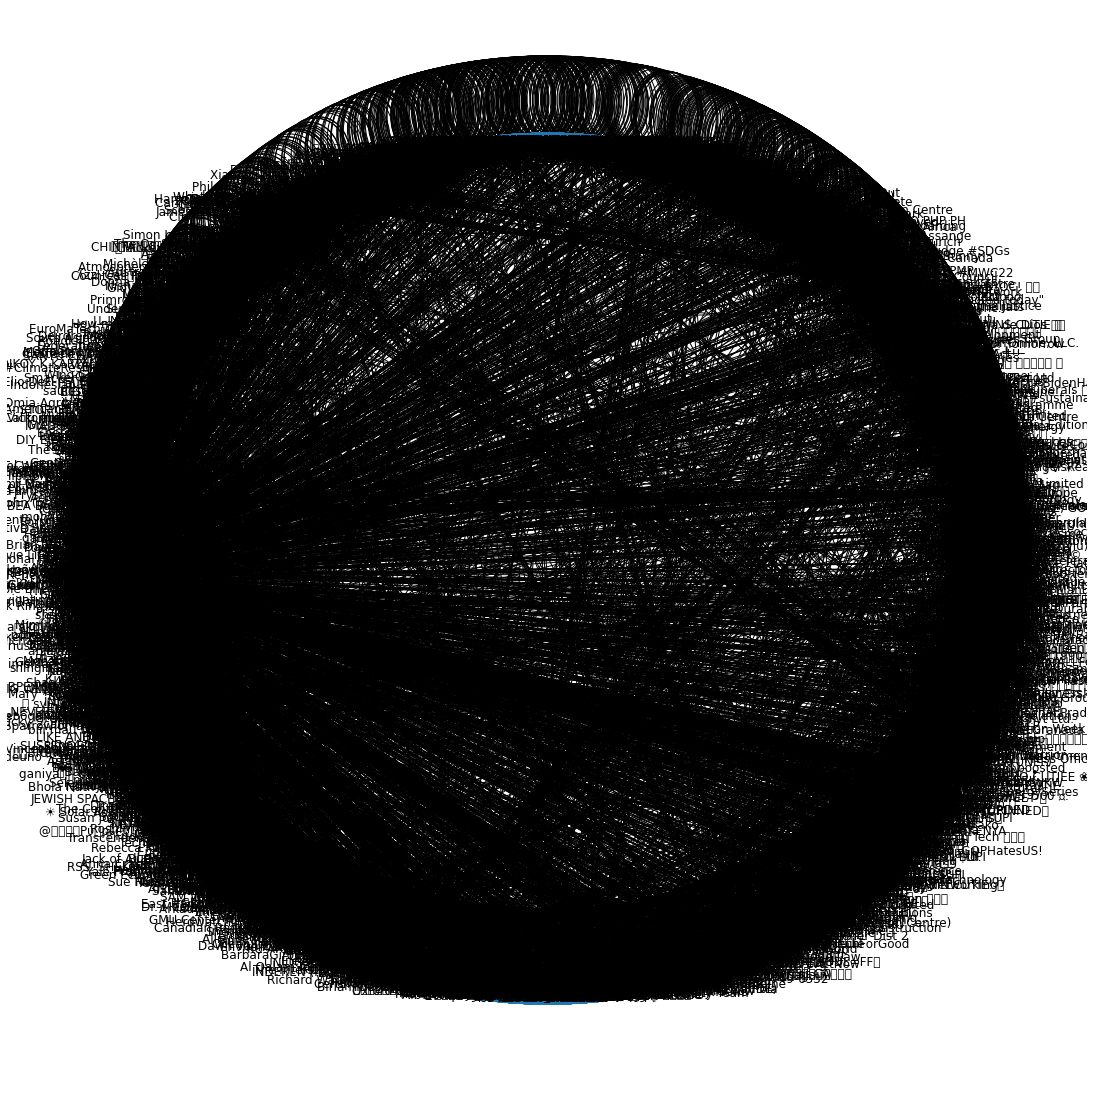

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.font_manager
matplotlib.font_manager._rebuild()

G_karate = nx.Graph()

for i in df2.index:
    G_karate.add_edge(df2.loc[i,'username'],df2.loc[i,'retweeted_username'])   

from matplotlib.pyplot import figure
figure(figsize=(15, 15))
nx.draw_shell(G_karate, with_labels = True)

In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [ ]:
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 1531 communities.


In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [ ]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

Font 'default' does not have a glyph for '\U0001f340' [U+1f340], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f340' [U+1f340], substituting with a dummy symbol.


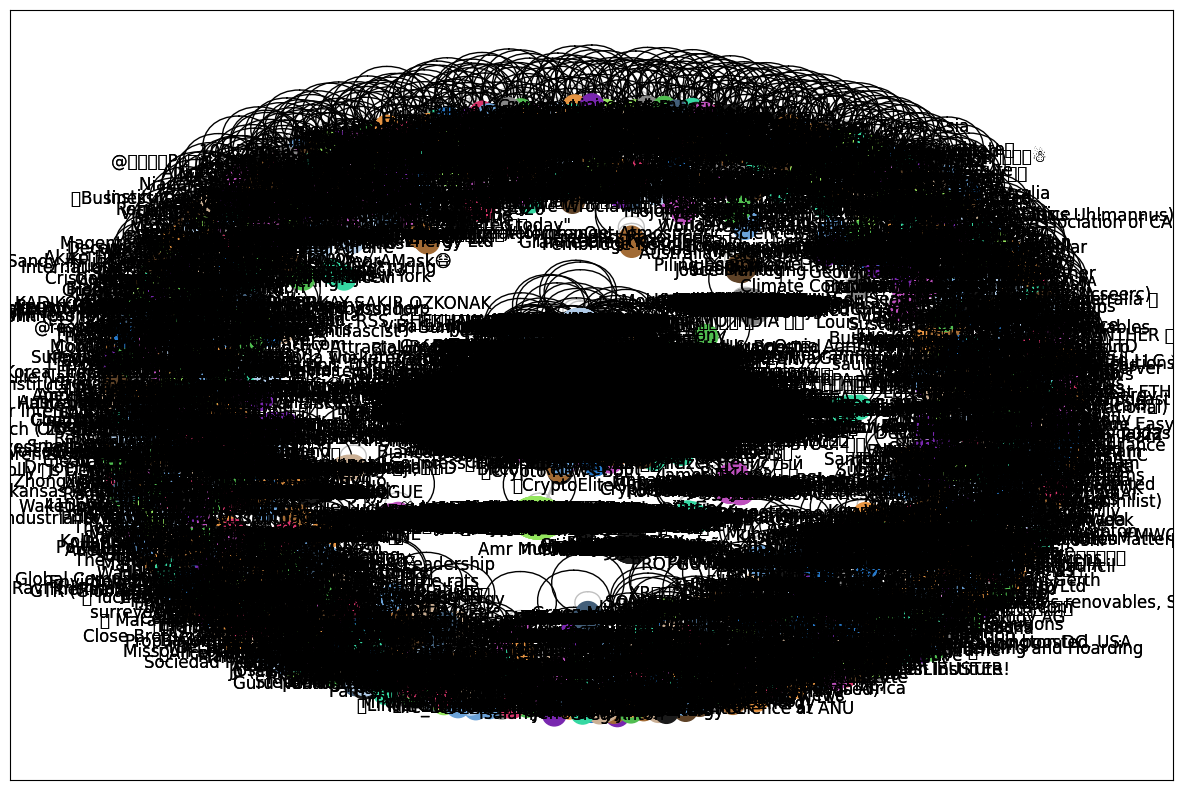

In [ ]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In [ ]:
pos = nx.spring_layout(G_karate, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_karate,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# external edges
nx.draw_networkx(
    G_karate,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_karate, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)


Community 0

In [ ]:
def com1(s):
    if s in list(communities[0]):
        return True
    else:
        return False

In [ ]:
df_temp = df[df['username'].map(com1)][['username','retweeted_username']] #df2[['username','retweeted_username']]

print('tweets', sum(df['username'].map(com1)))
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
print('users', len(df_temp.drop_duplicates()))
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

tweets 4721
users 2530


In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['energyreferral.xyz', 'John Snowmountainer', 'Bob Sacamano',
       'Tramikatodor', 'Andrea', 'renewables', 'Andreas Iliou',
       'We, included.', 'JFSebastian146',
       'Transcendent Energy Tech Solutions Pvt. Ltd.', 'Alexis TTh',
       'Cornwall Alliance', 'STRATHMORE ENERGY RESEARCH CENTRE',
       'Jane Eden', 'North American Clean Energy'], dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['energyreferral.xyz', 'John Snowmountainer', 'Andreas Iliou',
       'Transcendent Energy Tech Solutions Pvt. Ltd.', 'Suntuity Group',
       'Suntuity Solar', 'RENVU', 'plopandrew', 'Sitetracker',
       'ArmandRichelieuofPoitou', 'Cali One Services',
       '☀️ Solar Power & Battery Storage Directory ☀️',
       'North American Clean Energy', 'Cliantech Solutions',
       'Haliburton Solar and Wind'], dtype=object)

In [ ]:
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i in range(5):
  def com1(s):
      if s in list(communities[i]):
          return True
      else:
          return False

  df[df['username'].map(com1)][['username','text']]

  temp_df = df[df['username'].map(com1)][['username','text']]
  " ".join(list(temp_df['text'])) 

  counter = Counter(" ".join(list(temp_df['text'])))
  text = " ".join(list(temp_df['text']))
  tokens = word_tokenize(text.lower())
  filtered_tokens = []
  for w in tokens:
    if w not in stop_words:
        filtered_tokens.append(w)
  punc = ['.','#', '#', '!', ';', '&', '?', '-', 'rt', '%', '$', ')', '(', '_', '...', ':', '@']
  filtered_tokens_1 = []
  for w in filtered_tokens:
    if w not in punc:
        filtered_tokens_1.append(w)
  counter = Counter(filtered_tokens_1)
  print({k: v for k, v in sorted(counter.items(), reverse = True, key=lambda item: item[1])})
  print("------------------------------------------")

{'https': 3241, 'renewableenergy': 2661, ',': 2036, 'energy': 1418, 'solar': 949, 'renewables': 705, 'ev': 598, 'tesla': 555, '’': 512, 'renewable': 506, 'power': 426, 'climatechange': 426, 'amp': 418, 'electricvehicles': 380, 'wind': 370, "'s": 358, 'solarpower': 307, 'solarenergy': 293, 'new': 276, 'greenenergy': 271, 'hydrogen': 256, 'zxcxz_xyz': 249, 'cleanenergy': 248, 'us': 218, 'green': 212, '…': 198, 'electricity': 196, 'sustainability': 195, 'climate': 179, 'today': 178, 'clean': 160, 'charging': 154, 'via': 150, 'get': 141, 'industry': 139, 'one': 134, 'read': 133, 'electric': 131, 'carbon': 130, 'climateaction': 128, 'market': 125, 'india': 123, 'future': 123, 'news': 123, 'gas': 120, 'year': 118, 'solarpanels': 117, 'storage': 116, '``': 113, 'know': 113, 'sustainable': 111, '2022': 107, 'offshore': 103, 'transition': 103, 'project': 102, 'world': 102, 'environment': 101, 'projects': 96, 'use': 95, 'help': 94, 'full': 94, 'climatecrisis': 93, 'check': 89, 'australia': 88, '

Community 1

In [ ]:
def com1(s):
    if s in list(communities[1]):
        return True
    else:
        return False
        
df_temp = df[df['username'].map(com1)][['username','retweeted_username']] #df2[['username','retweeted_username']]

print('tweets', sum(df['username'].map(com1)))
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
print('users', len(df_temp.drop_duplicates()))
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

tweets 692
users 632


In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['MetaMine', '$UPI citraneko Chan (ʘ言ʘ╬)', '......',
       '2022 BIG WINS 6️⃣5️⃣🎹', '@Finesa Be Winner', '@SiSobel_i2',
       '@rosiesvts', 'AD *,* BIG WINS CUTIE 💫', 'AErON', 'ATP\U0001f90d',
       'Aaliyah⁷💃', 'Abade', 'Abuchikek', 'Adeeva Kawaii', 'Adel.'],
      dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['MetaMine', '$UPI citraneko Chan (ʘ言ʘ╬)', '......',
       '2022 BIG WINS 6️⃣5️⃣🎹', '@Finesa Be Winner', '@SiSobel_i2',
       '@rosiesvts', 'AD *,* BIG WINS CUTIE 💫', 'AErON', 'ATP\U0001f90d',
       'Aaliyah⁷💃', 'Abade', 'Abuchikek', 'Adeeva Kawaii', 'Adel.'],
      dtype=object)

Community 2

In [ ]:
def com1(s):
    if s in list(communities[2]):
        return True
    else:
        return False

df_temp = df[df['username'].map(com1)][['username','retweeted_username']] #df2[['username','retweeted_username']]

print('tweets', sum(df['username'].map(com1)))
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
print('users', len(df_temp.drop_duplicates()))
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

tweets 429
users 390


In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['Mike Hudema', 'Susan Joy Hassol, Climate Communication',
       'Silicon Valley North', 'George Tsakraklides',
       'The Greta Effect-EarthWins', 'C-Smart Solutions', 'Youssuf Sabek',
       'Leo Trollope', 'Sustainable Warrior💙🌎', 'GoSolarASAP.Org',
       'Chris McKee', 'Robert Redmayne Hosking',
       'Professor Peter Strachan',
       'Anna Crabb | CEO Australian Energy Foundation',
       '💧🌏 🔥Lynette Kennedy'], dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['Mike Hudema', 'The Greta Effect-EarthWins', 'Leo Trollope',
       'GoSolarASAP.Org', 'Youssuf Sabek', 'CMR10', 'Chris McKee',
       'Daryl Delsignore', 'BarbaraGirouard, Stranger in a Stranger Land',
       'P.H.𝚽', 'April', 'Rio Joir', 'Shekar .J',
       'Susan Joy Hassol, Climate Communication',
       'Robert Redmayne Hosking'], dtype=object)

In [ ]:
# Community 3

In [ ]:
def com1(s):
    if s in list(communities[3]):
        return True
    else:
        return False

df_temp = df[df['username'].map(com1)][['username','retweeted_username']] #df2[['username','retweeted_username']]

print('tweets', sum(df['username'].map(com1)))
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
print('users', len(df_temp.drop_duplicates()))
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

tweets 477
users 349


In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['Dev Khanna', 'Arik Ring - Energy Engineering Expert',
       '🇺🇳 #UN 🇺🇳 #SDGs 🌏 #ClimateAction 🌐 #ActNow', 'Earth Accounting',
       'Dhritiman Deka', 'Shi4Tech 💙 #TechForGood 💙',
       'Alberto E. Machado #MWC22 #StandWithUkraine', 'Clearloop',
       'Dr. Marcell Vollmer #StaySafe & Carpe Diem', 'Lena Hansson 🇸🇪🇺🇳',
       'Robert Robinson', 'Total', 'Empowered By Light',
       'HELLENIC SHIPPING NEWS Worldwide', 'MaerskSupplyService'],
      dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['Dev Khanna', 'Arik Ring - Energy Engineering Expert',
       'Diane Kaneza #MWC22 🌍🇧🇮🇪🇸🇪🇺', 'Pierre-Emmanuel SAUCET',
       '🇺🇳 #UN 🇺🇳 #SDGs 🌏 #ClimateAction 🌐 #ActNow', 'Dhritiman Deka',
       'Dr. Marcell Vollmer #StaySafe & Carpe Diem', 'Peet Tetteroo 🇺🇦',
       'Shi4Tech 💙 #TechForGood 💙',
       'Alberto E. Machado #MWC22 #StandWithUkraine',
       'Peter Tendekayi Chingonzo', 'Jaime Aguilar M', 'Jeroen Bartelse',
       'Permanent Future Lab', 'Robert Robinson'], dtype=object)